In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df=pd.read_csv("./Social_Network_Ads.csv")
df.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [3]:
df=df.drop("User ID",axis=1)
df["Gender"].replace(["Male","Female"],[1,0],inplace=True)

In [4]:
df.head(4)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [8]:
minmax.fit(x_train)

x_train_scaled=minmax.fit_transform(x_train)
x_test_scaled=minmax.fit_transform(x_test)

**Fitting SVM to the Training set**

In [12]:
from sklearn.svm import SVC
sv=SVC(C=1,kernel="rbf")
sv.fit(x_train_scaled,y_train)

SVC(C=1)

In [14]:
print("THE TRAINING ERROR IS :",round(sv.score(x_train_scaled,y_train),2))
print("THE TESTING ERROR IS :",round(sv.score(x_test_scaled,y_test),2))


THE TRAINING ERROR IS : 0.91
THE TESTING ERROR IS : 0.89


**Predicting the Test set results**

In [16]:
y_train_pred=sv.predict(x_train_scaled)
y_test_pred=sv.predict(x_test_scaled)

**Making the Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
train_matrix=confusion_matrix(y_train,y_train_pred)
test_matrix=confusion_matrix(y_test,y_test_pred)

**Visualising the Training set results**

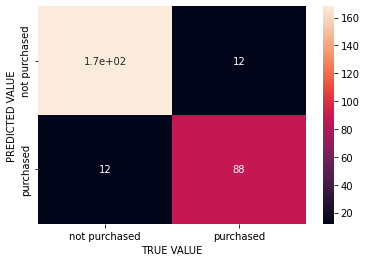

In [21]:
import seaborn as sns
sns.heatmap(train_matrix,annot=True,xticklabels=["not purchased","purchased"],yticklabels=["not purchased","purchased"])
plt.xlabel("TRUE VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()

**Visualising the Test set results**

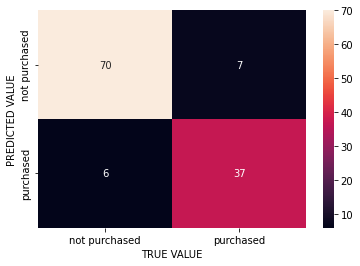

In [22]:
sns.heatmap(test_matrix,annot=True,xticklabels=["not purchased","purchased"],yticklabels=["not purchased","purchased"])
plt.xlabel("TRUE VALUE")
plt.ylabel("PREDICTED VALUE")
plt.show()